<a href="https://colab.research.google.com/github/Hana0405/DA/blob/main/Online_Retailer_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load sales data
url = '/content/sample_data/Superstore.xls'
data = pd.read_excel(url)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [ ]:
data.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,"9,994.00",9994,9994,"9,994.00","9,994.00","9,994.00","9,994.00","9,994.00"
mean,"4,997.50",2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,"55,190.38",229.86,3.79,0.16,28.66
min,1.00,2014-01-03 00:00:00,2014-01-07 00:00:00,"1,040.00",0.44,1.00,0.00,"-6,599.98"
25%,"2,499.25",2015-05-23 00:00:00,2015-05-27 00:00:00,"23,223.00",17.28,2.00,0.00,1.73
50%,"4,997.50",2016-06-26 00:00:00,2016-06-29 00:00:00,"56,430.50",54.49,3.00,0.20,8.67
75%,"7,495.75",2017-05-14 00:00:00,2017-05-18 00:00:00,"90,008.00",209.94,5.00,0.20,29.36
max,"9,994.00",2017-12-30 00:00:00,2018-01-05 00:00:00,"99,301.00","22,638.48",14.00,0.80,"8,399.98"
std,"2,885.16",NaN,NaN,"32,063.69",623.25,2.23,0.21,234.26


In [ ]:
# Display number of unique values for each attribute
unique_counts = data.nunique()
print("Number of unique values for each attribute:")
print(unique_counts)
# Display unique values for each attribute (or a sample if there are too many unique values)
print("\nUnique values for each attribute:")

for column in data.columns:
    unique_values = data[column].unique()
    num_unique_values = len(unique_values)

    if num_unique_values > 20:  # If there are more than 20 unique values, display only the first 20
        print(f"\n{column} (showing 20 of {num_unique_values} unique values):")
        print(unique_values[:20])
    else:
        print(f"\n{column} ({num_unique_values} unique values):")
        print(unique_values)

Number of unique values for each attribute:
Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

Unique values for each attribute:

Row ID (showing 20 of 9994 unique values):
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

Order ID (showing 20 of 5009 unique values):
['CA-2016-152156' 'CA-2016-138688' 'US-2015-108966' 'CA-2014-115812'
 'CA-2017-114412' 'CA-2016-161389' 'US-2015-118983' 'CA-2014-105893'
 'CA-2014-167164' 'CA-2014-143336' 'CA-2016-137330' 'US-2017-156909'
 'CA-2015-106320' 'CA-2016-121755' 'US-2015-150630' 'CA-2017-107727'
 'CA-2016-117590' 

# Preprocessing

In [ ]:
# Data cleaning: Convert date columns to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# Descriptive Analytics: Sales

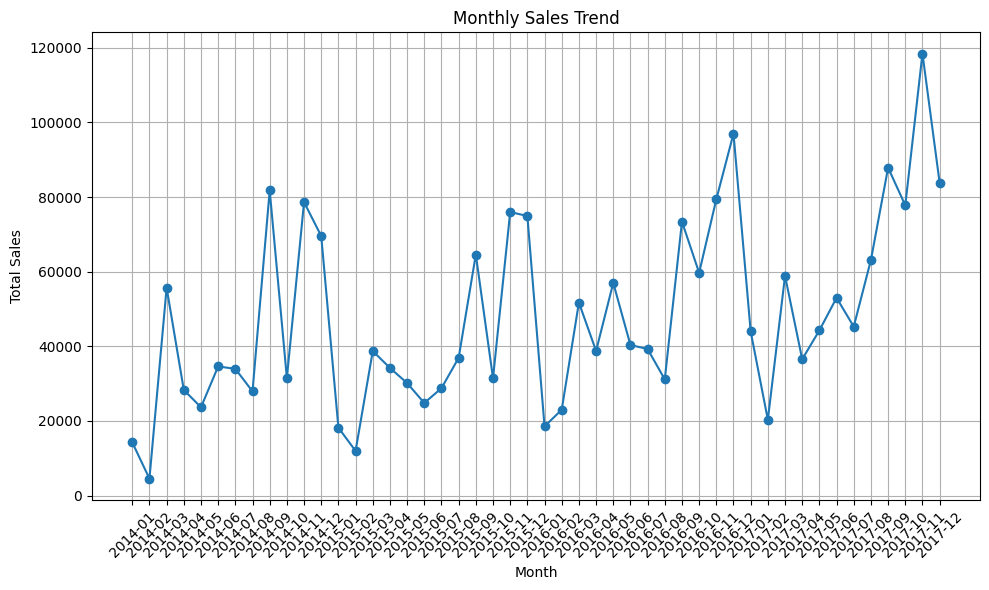

In [ ]:
# Descriptive Analytics: Total sales per month
data['Month'] = data['Order Date'].dt.to_period('M')
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()

# Visualization: Monthly sales trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
# Adding annotations for sales numbers
# for i, txt in enumerate(monthly_sales['Sales']):
#     plt.annotate(txt, (monthly_sales['Month'].astype(str)[i], monthly_sales['Sales'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

# plt.tight_layout()
# plt.show()


Total Sales by Region (sorted):
    Region      Sales
3     West 725,457.82
1     East 678,781.24
0  Central 501,239.89
2    South 391,721.91

Total Sales by State (sorted):
                   State      Sales
3             California 457,687.63
30              New York 310,876.27
41                 Texas 170,188.05
45            Washington 138,641.27
36          Pennsylvania 116,511.91
8                Florida  89,473.71
11              Illinois  80,166.10
33                  Ohio  78,258.14
20              Michigan  76,269.61
44              Virginia  70,636.72
31        North Carolina  55,603.16
12               Indiana  53,555.36
9                Georgia  49,095.84
15              Kentucky  36,591.75
28            New Jersey  35,764.31
1                Arizona  35,282.00
47             Wisconsin  32,114.61
4               Colorado  32,108.12
40             Tennessee  30,661.87
21             Minnesota  29,863.15
19         Massachusetts  28,634.43
6               Delaware  27,451.

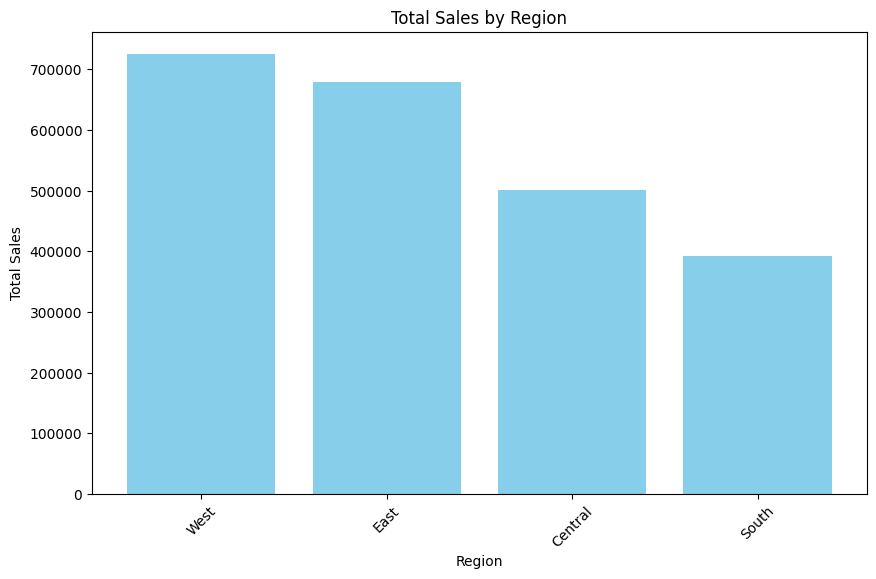

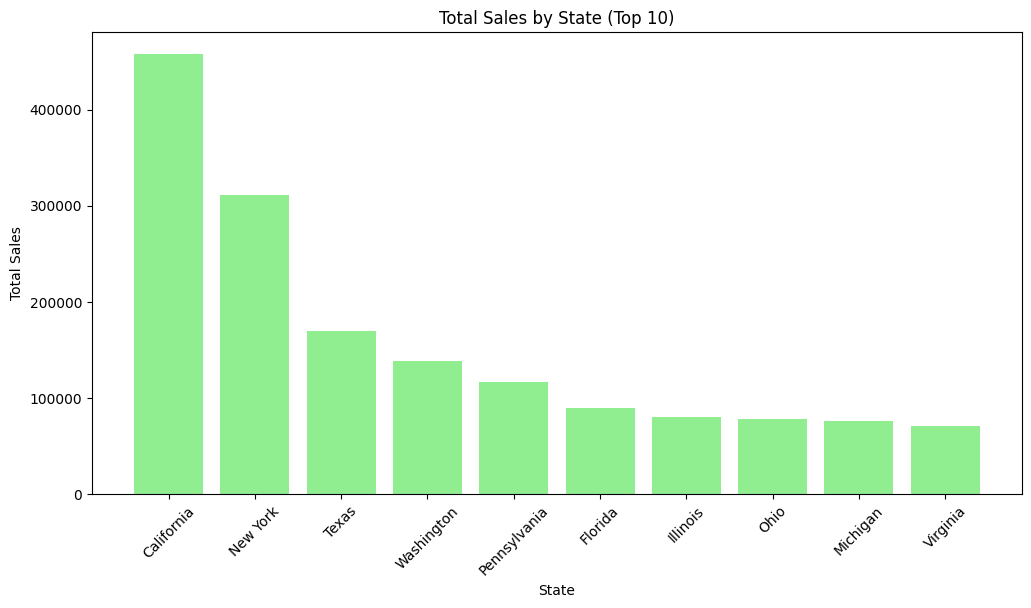

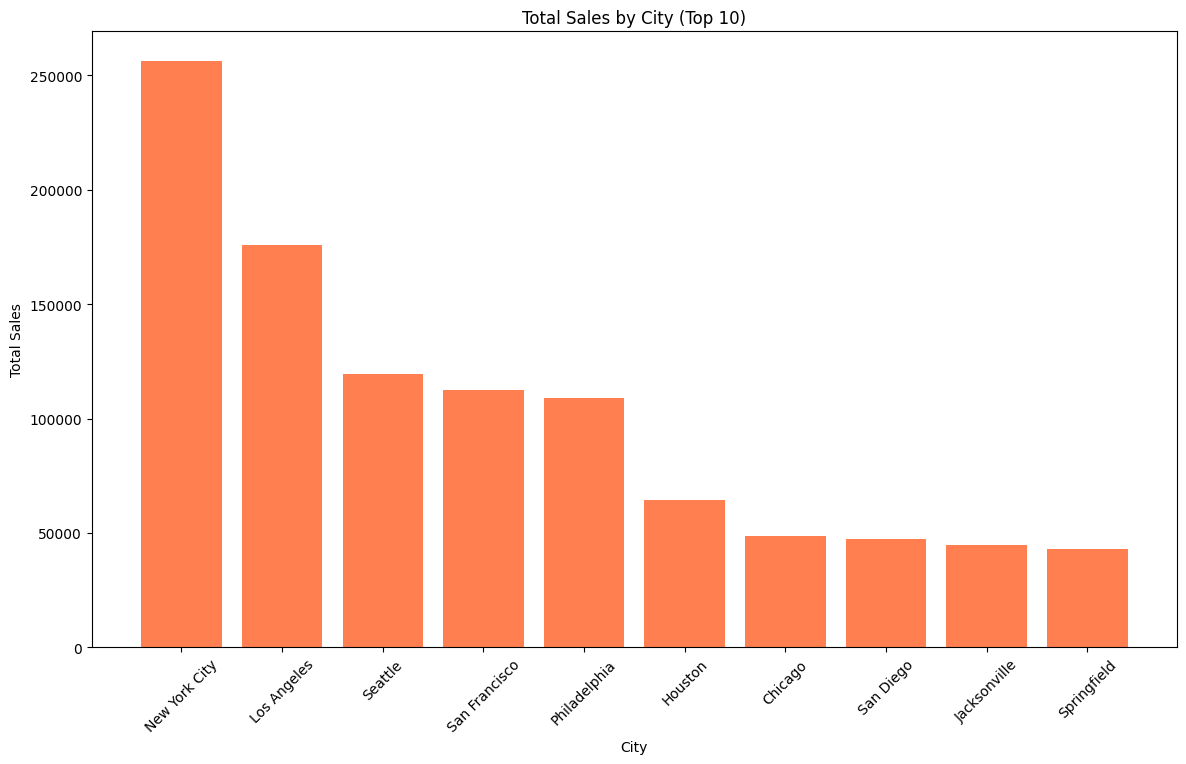

In [ ]:
#TOTAL SALES BY REGION, STATE, CITY
# Group the data by region, state, and city and sum the sales
sales_by_region = data.groupby('Region')['Sales'].sum().reset_index()
sales_by_state = data.groupby('State')['Sales'].sum().reset_index()
sales_by_city = data.groupby('City')['Sales'].sum().reset_index()

#  Sort by sales to see the top performers
sales_by_region = sales_by_region.sort_values(by='Sales', ascending=False)
sales_by_state = sales_by_state.sort_values(by='Sales', ascending=False)
sales_by_city = sales_by_city.sort_values(by='Sales', ascending=False)

print("\nTotal Sales by Region (sorted):")
print(sales_by_region)

print("\nTotal Sales by State (sorted):")
print(sales_by_state)

print("\nTotal Sales by City (sorted):")
print(sales_by_city)

# Plotting total sales by region
plt.figure(figsize=(10, 6))
plt.bar(sales_by_region['Region'], sales_by_region['Sales'], color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Plotting total sales by state (top 10 states for better visibility)
plt.figure(figsize=(12, 6))
top_states = sales_by_state.head(10)
plt.bar(top_states['State'], top_states['Sales'], color='lightgreen')
plt.title('Total Sales by State (Top 10)')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Plotting total sales by city (top 10 cities for better visibility)
plt.figure(figsize=(14, 8))
top_cities = sales_by_city.head(10)
plt.bar(top_cities['City'], top_cities['Sales'], color='coral')
plt.title('Total Sales by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

       Segment        Sales
0     Consumer 1,161,401.34
1    Corporate   706,146.37
2  Home Office   429,653.15


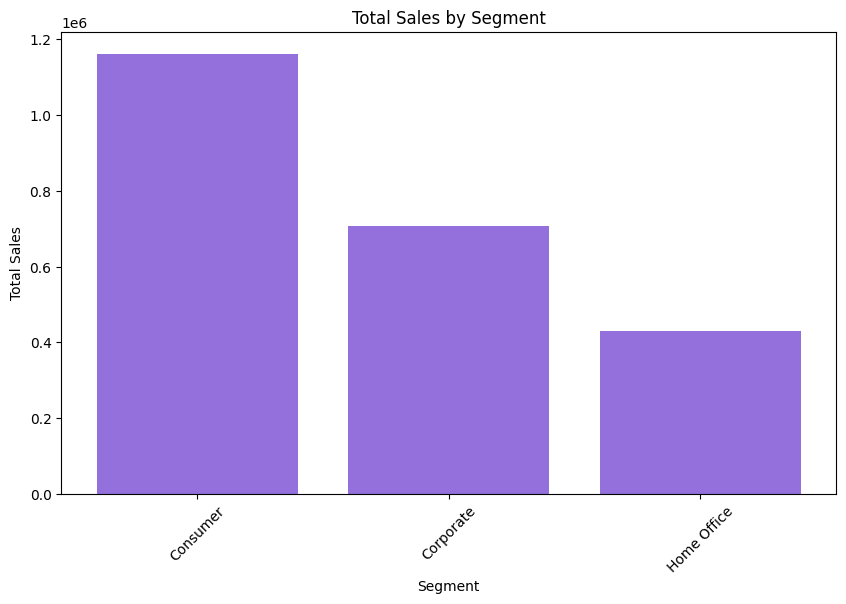

In [ ]:
#TOTAL SALES BY SEGMENT
pd.options.display.float_format = '{:,.2f}'.format
#Group the data by segment and sum the sales
sales_by_segment = data.groupby('Segment')['Sales'].sum().reset_index()

# Sort by sales to see the top performers
sales_by_segment = sales_by_segment.sort_values(by='Sales', ascending=False)
print(sales_by_segment)
# Plotting total sales by segment
plt.figure(figsize=(10, 6))
plt.bar(sales_by_segment['Segment'], sales_by_segment['Sales'], color='mediumpurple')
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


Total Sales by Category (sorted):
          Category      Sales
2       Technology 836,154.03
0        Furniture 741,999.80
1  Office Supplies 719,047.03


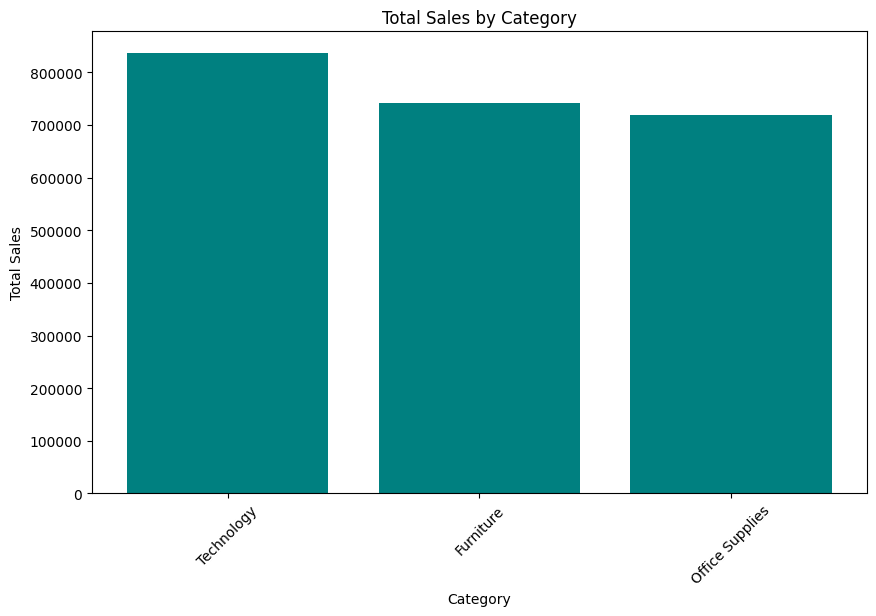

In [ ]:
#TOTAL SALES BY CATEGORY
# Group the data by category and sum the sales
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()

# Sort by sales to see the top performers
sales_by_category = sales_by_category.sort_values(by='Sales', ascending=False)

print("\nTotal Sales by Category (sorted):")
print(sales_by_category)

# Plotting total sales by category
plt.figure(figsize=(10, 6))
plt.bar(sales_by_category['Category'], sales_by_category['Sales'], color='teal')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


Total Sales by Sub-Category (sorted):
   Sub-Category      Sales
13       Phones 330,007.05
5        Chairs 328,449.10
14      Storage 223,843.61
16       Tables 206,965.53
3       Binders 203,412.73
11     Machines 189,238.63
0   Accessories 167,380.32
6       Copiers 149,528.03
4     Bookcases 114,880.00
1    Appliances 107,532.16
9   Furnishings  91,705.16
12        Paper  78,479.21
15     Supplies  46,673.54
2           Art  27,118.79
7     Envelopes  16,476.40
10       Labels  12,486.31
8     Fasteners   3,024.28


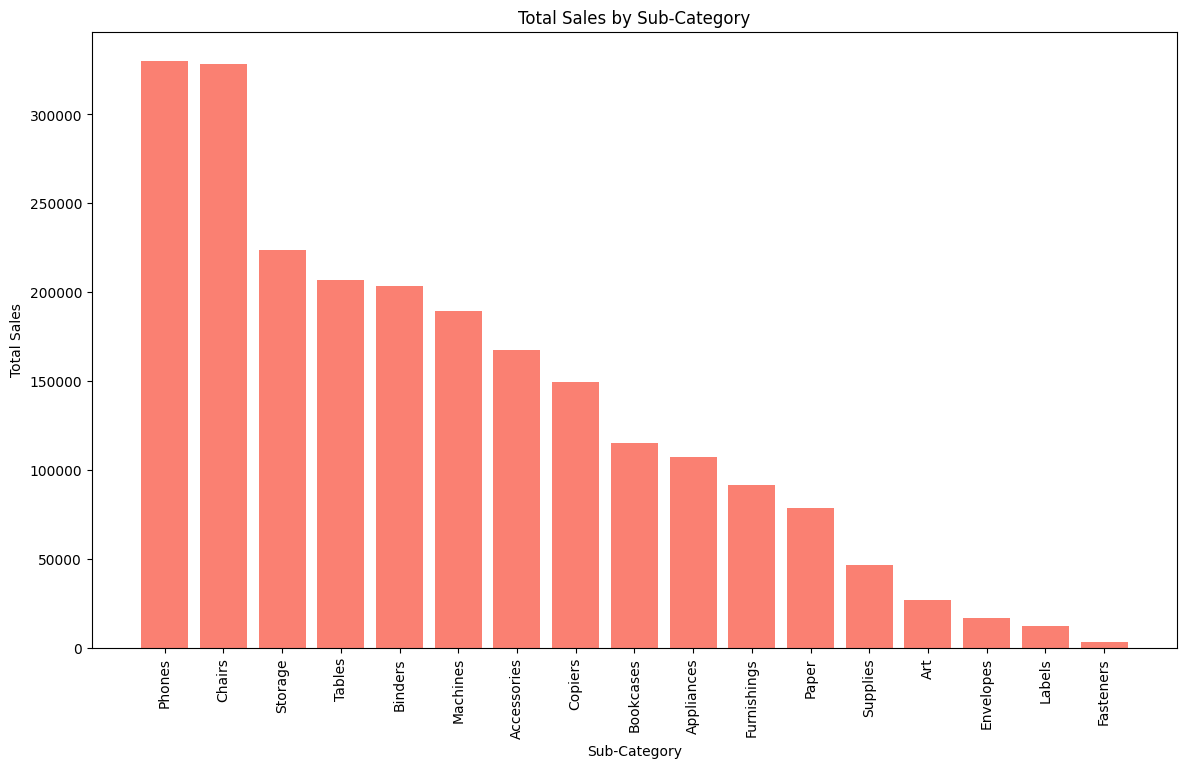

In [ ]:
#TOTAL SALES BY SUB-CATEGORY
# Group the data by sub-category and sum the sales
sales_by_sub_category = data.groupby('Sub-Category')['Sales'].sum().reset_index()

#Sort by sales to see the top performers
sales_by_sub_category = sales_by_sub_category.sort_values(by='Sales', ascending=False)

print("\nTotal Sales by Sub-Category (sorted):")
print(sales_by_sub_category)

# Plotting total sales by sub-category
plt.figure(figsize=(14, 8))
plt.bar(sales_by_sub_category['Sub-Category'], sales_by_sub_category['Sales'], color='salmon')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


Total Sales by Ship Mode (sorted):
        Ship Mode        Sales
3  Standard Class 1,358,215.74
2    Second Class   459,193.57
0     First Class   351,428.42
1        Same Day   128,363.12


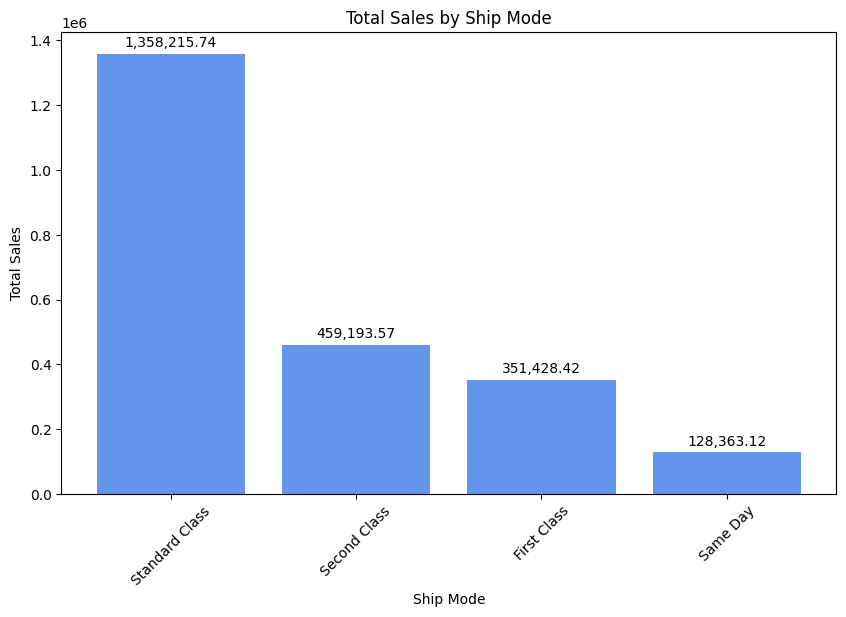

In [ ]:
#TOTAL SALES BY SHIP MODE
# Group the data by ship mode and sum the sales
sales_by_ship_mode = data.groupby('Ship Mode')['Sales'].sum().reset_index()

#  Sort by sales to see the top performers
sales_by_ship_mode = sales_by_ship_mode.sort_values(by='Sales', ascending=False)

print("\nTotal Sales by Ship Mode (sorted):")
print(sales_by_ship_mode)

# Plotting total sales by ship mode
plt.figure(figsize=(10, 6))
# plt.bar(sales_by_ship_mode['Ship Mode'], sales_by_ship_mode['Sales'], color='cornflowerblue')
bars = plt.bar(sales_by_ship_mode['Ship Mode'], sales_by_ship_mode['Sales'], color='cornflowerblue')
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
# Annotate bars with sales values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.show()

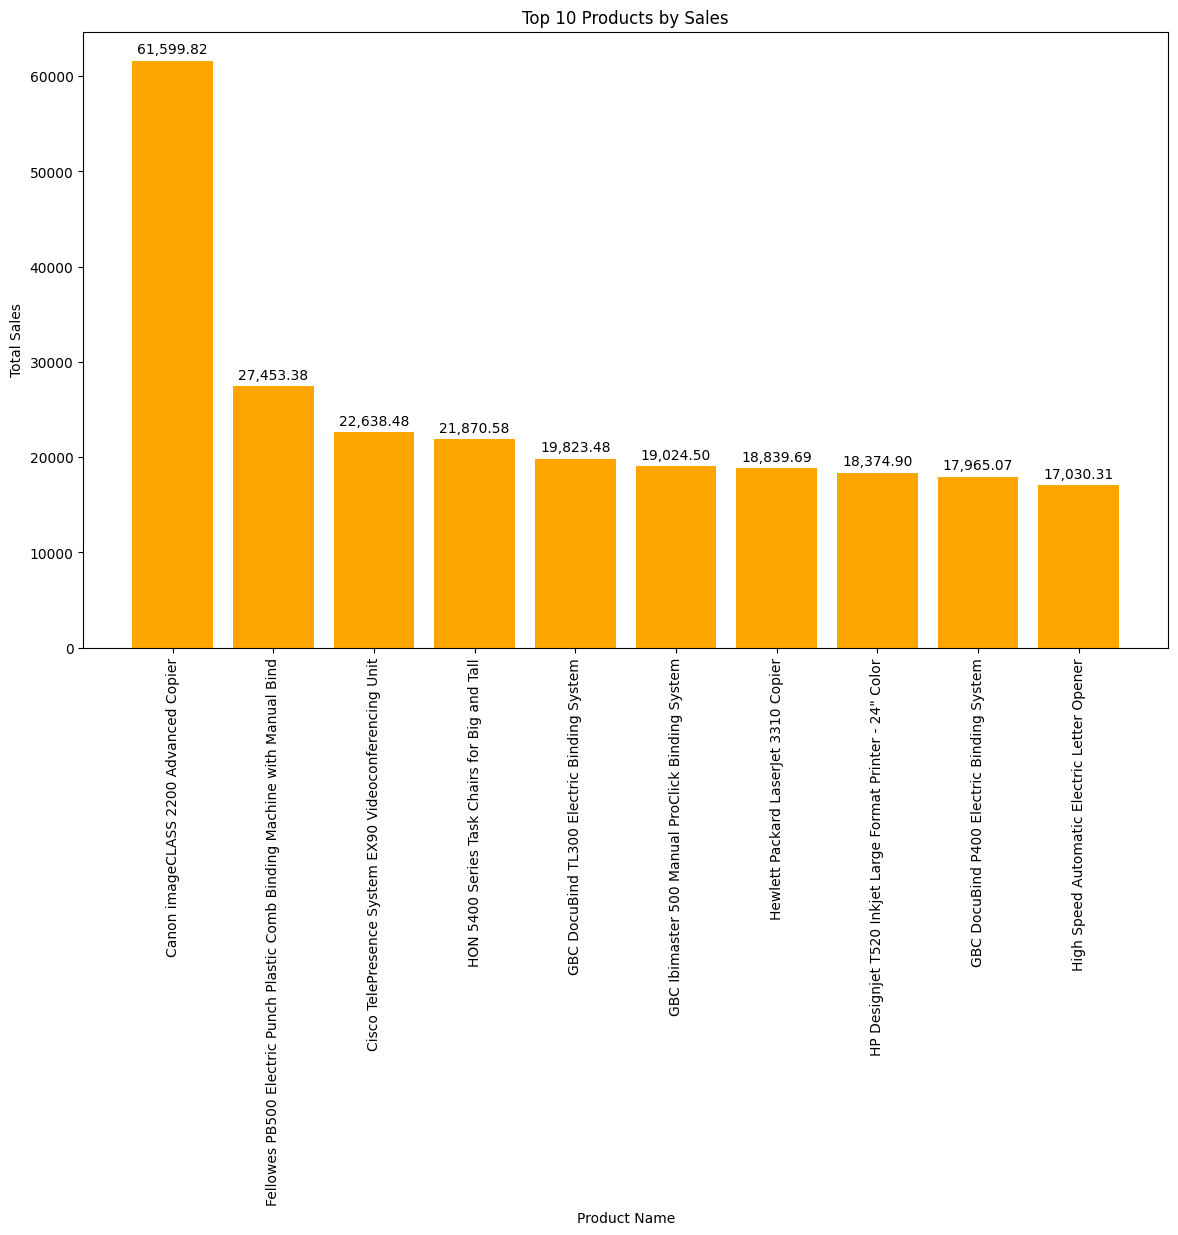

In [ ]:
#TOP 1O PRODUCTS BY SALES
# Group the data by product and sum the sales
sales_by_product = data.groupby('Product Name')['Sales'].sum().reset_index()

# Sort by sales to find the top performers
top_products = sales_by_product.sort_values(by='Sales', ascending=False).head(10)

# Plotting top 10 products by sales
plt.figure(figsize=(14, 8))
bars = plt.bar(top_products['Product Name'], top_products['Sales'], color='orange')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
# Annotate bars with sales values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.show()

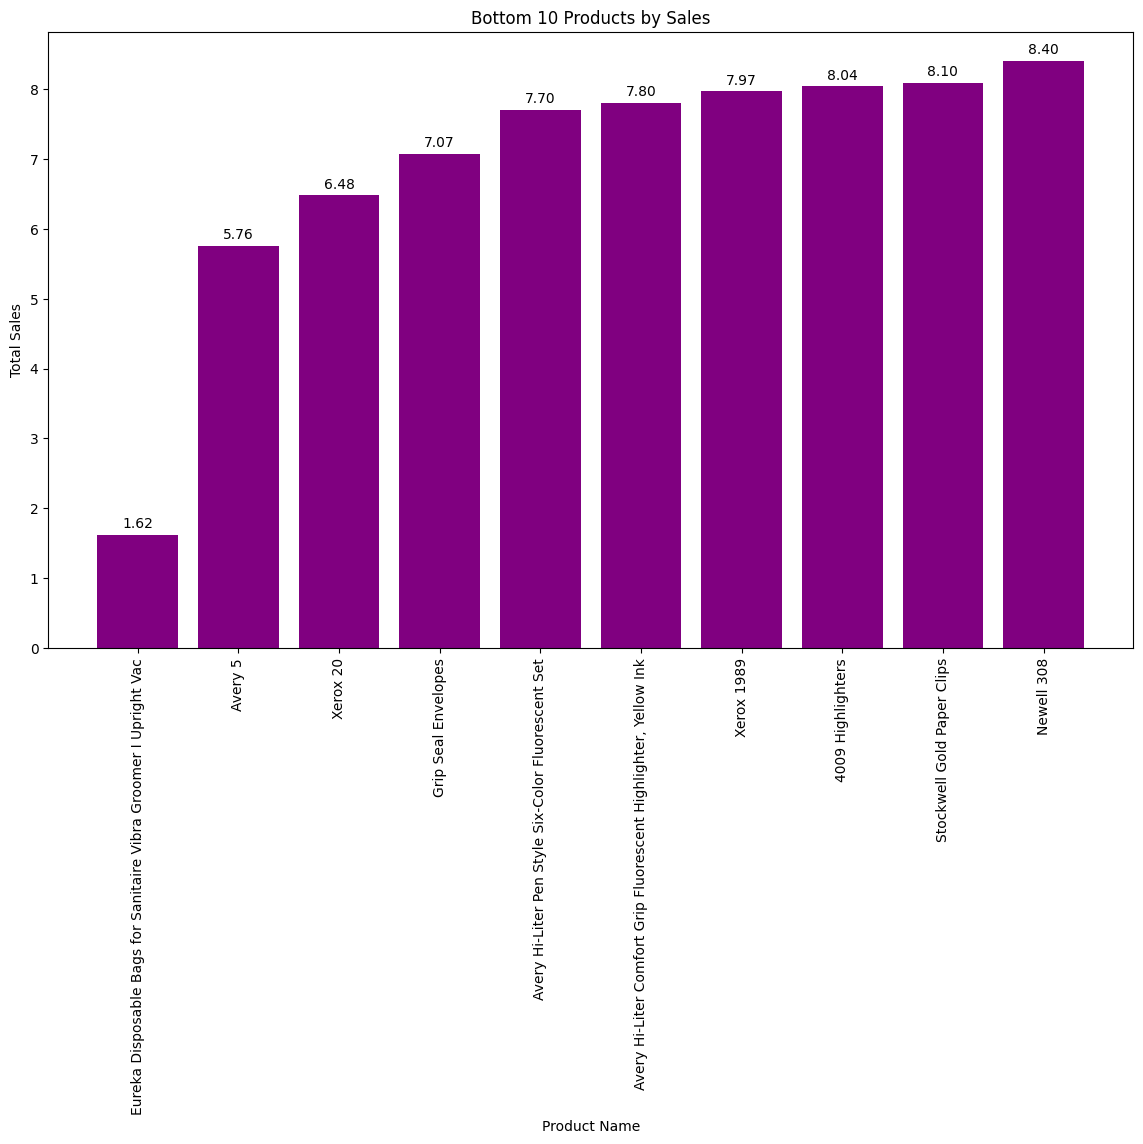

In [ ]:
#Bottom 10 Products by Sales
bottom_products = sales_by_product.sort_values(by='Sales', ascending=True).head(10)
# print(bottom_products)
plt.figure(figsize=(14, 8))
bars = plt.bar(bottom_products['Product Name'], bottom_products['Sales'], color='purple')
plt.title('Bottom 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
# Annotate bars with sales values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.show()

# Sales Forecasting

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA
# import warnings
# warnings.filterwarnings("ignore")

In [ ]:
# # Set 'Order Date' as the index
# data.set_index('Order Date', inplace=True)

# # Aggregate sales by day, month, and year
# daily_sales = data['Sales'].resample('D').sum()
# monthly_sales = data['Sales'].resample('M').sum()
# yearly_sales = data['Sales'].resample('Y').sum()

# # Display first few entries to verify
# print(daily_sales.head())
# print(monthly_sales.head())
# print(yearly_sales.head())

In [ ]:
# def forecast_sales(sales_data, order=(5, 1, 0), periods=30, freq='D'):
#     """
#     Fit an ARIMA model and forecast sales.

#     :param sales_data: Time series data of sales
#     :param order: ARIMA model order (p, d, q)
#     :param periods: Number of periods to forecast
#     :param freq: Frequency of forecast ('D' for daily, 'M' for monthly, 'Y' for yearly)
#     :return: Forecasted sales
#     """
#     # Fit the model
#     model = ARIMA(sales_data, order=order)
#     model_fit = model.fit()

#     # Forecast
#     forecast = model_fit.forecast(steps=periods)

#     # Create a DataFrame to hold forecast values
#     forecast_index = pd.date_range(start=sales_data.index[-1], periods=periods+1, freq=freq)[1:]
#     forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_index)

#     return forecast_df


In [ ]:
# # Forecast daily sales for the next 30 days
# daily_forecast = forecast_sales(daily_sales, periods=30, freq='D')
# print(daily_forecast)

# # Forecast monthly sales for the next 12 months
# monthly_forecast = forecast_sales(monthly_sales, periods=12, freq='M')
# print(monthly_forecast)

# # Forecast yearly sales for the next 5 years
# yearly_forecast = forecast_sales(yearly_sales, periods=5, freq='Y')
# print(yearly_forecast)


In [ ]:
# def plot_forecast(original_data, forecast_data, title='Sales Forecast'):
#     """
#     Plot the original sales data and forecasted data.

#     :param original_data: Original sales data
#     :param forecast_data: Forecasted sales data
#     :param title: Title of the plot
#     """
#     plt.figure(figsize=(12, 6))
#     plt.plot(original_data, label='Original')
#     plt.plot(forecast_data, label='Forecast', color='red')
#     plt.title(title)
#     plt.xlabel('Date')
#     plt.ylabel('Sales')
#     plt.legend()
#     plt.show()

# # Plot daily sales forecast
# plot_forecast(daily_sales, daily_forecast, title='Daily Sales Forecast')

# # Plot monthly sales forecast
# plot_forecast(monthly_sales, monthly_forecast, title='Monthly Sales Forecast')

# # Plot yearly sales forecast
# plot_forecast(yearly_sales, yearly_forecast, title='Yearly Sales Forecast')


In [ ]:
from prophet import Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo33id8i0/0_v1_pvk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo33id8i0/qkbhw51w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81448', 'data', 'file=/tmp/tmpo33id8i0/0_v1_pvk.json', 'init=/tmp/tmpo33id8i0/qkbhw51w.json', 'output', 'file=/tmp/tmpo33id8i0/prophet_model1h0ffnbe/prophet_model-20240610124416.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:44:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:44:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


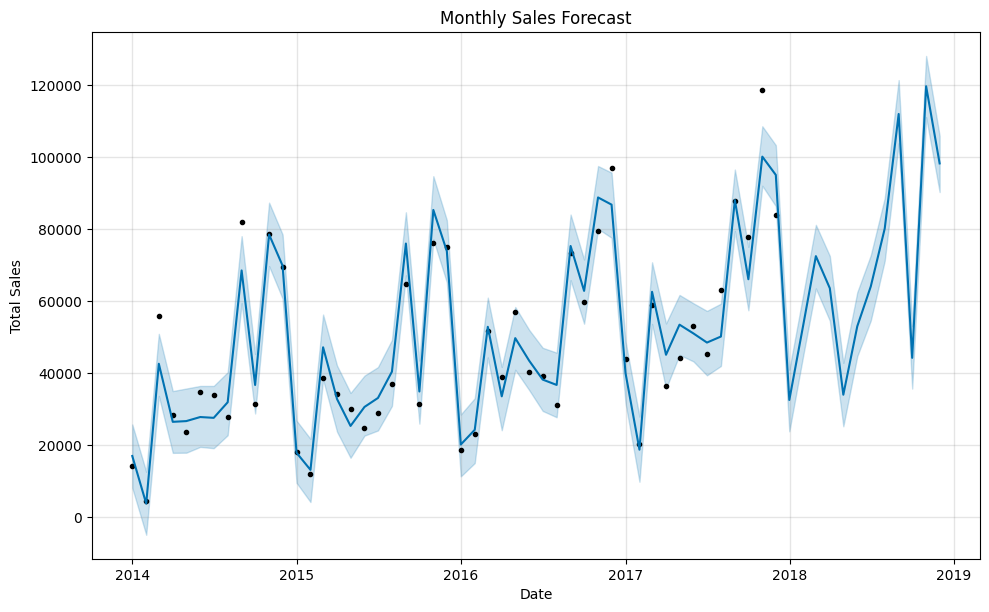

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
# Descriptive Analytics: Total sales per month
data['Month'] = data['Order Date'].dt.to_period('M')
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()
# Convert 'Month' to a datetime format for Prophet
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

# Prepare data for Prophet
df = monthly_sales.rename(columns={'Month': 'ds', 'Sales': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df)

# Make future dataframe for the next 12 months
future = model.make_future_dataframe(periods=12, freq='M')

# Predict future sales
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title('Monthly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# Plot forecast components
# fig2 = model.plot_components(forecast)
# plt.show()

# Descriptive Analytics: Profit


Profit by Region:
    Region     Profit
0  Central  39,706.36
1     East  91,522.78
2    South  46,749.43
3     West 108,418.45


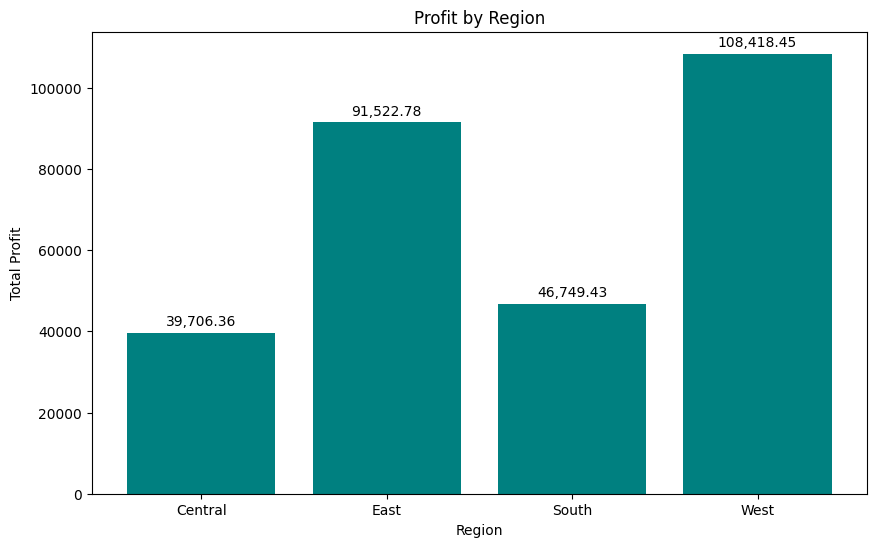

In [ ]:
# PROFIT BY REGION
# Group by region and sum the profits
profit_by_region = data.groupby('Region')['Profit'].sum().reset_index()

# Display the results
print("\nProfit by Region:")
print(profit_by_region)

# Visualization (optional)
plt.figure(figsize=(10, 6))
bars = plt.bar(profit_by_region['Region'], profit_by_region['Profit'], color='teal')
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')

# Annotate bars with profit values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()


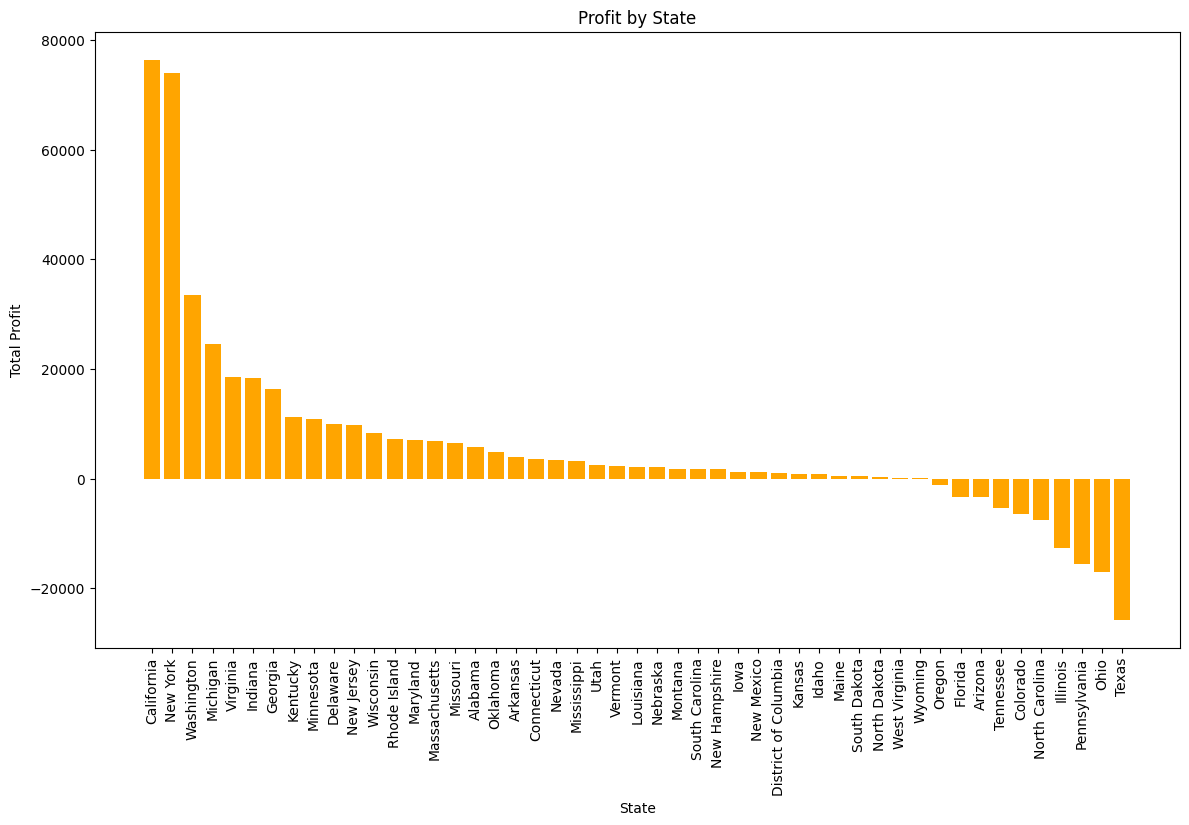

In [ ]:
#PROFIT BY STATES
# Group by state and sum the profits
profit_by_state = data.groupby('State')['Profit'].sum().reset_index()

# Sort by profit to see the top and bottom performers
profit_by_state = profit_by_state.sort_values(by='Profit', ascending=False)

# Visualization
plt.figure(figsize=(14, 8))
bars = plt.bar(profit_by_state['State'], profit_by_state['Profit'], color='orange')
plt.title('Profit by State')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)

# Annotate bars with profit values
# for bar in bars:
#     height = bar.get_height()
#     plt.annotate(f'{height:,.2f}',
#                  xy=(bar.get_x() + bar.get_width() / 2, height),
#                  xytext=(0, 3),  # 3 points vertical offset
#                  textcoords="offset points",
#                  ha='center', va='bottom')

plt.show()


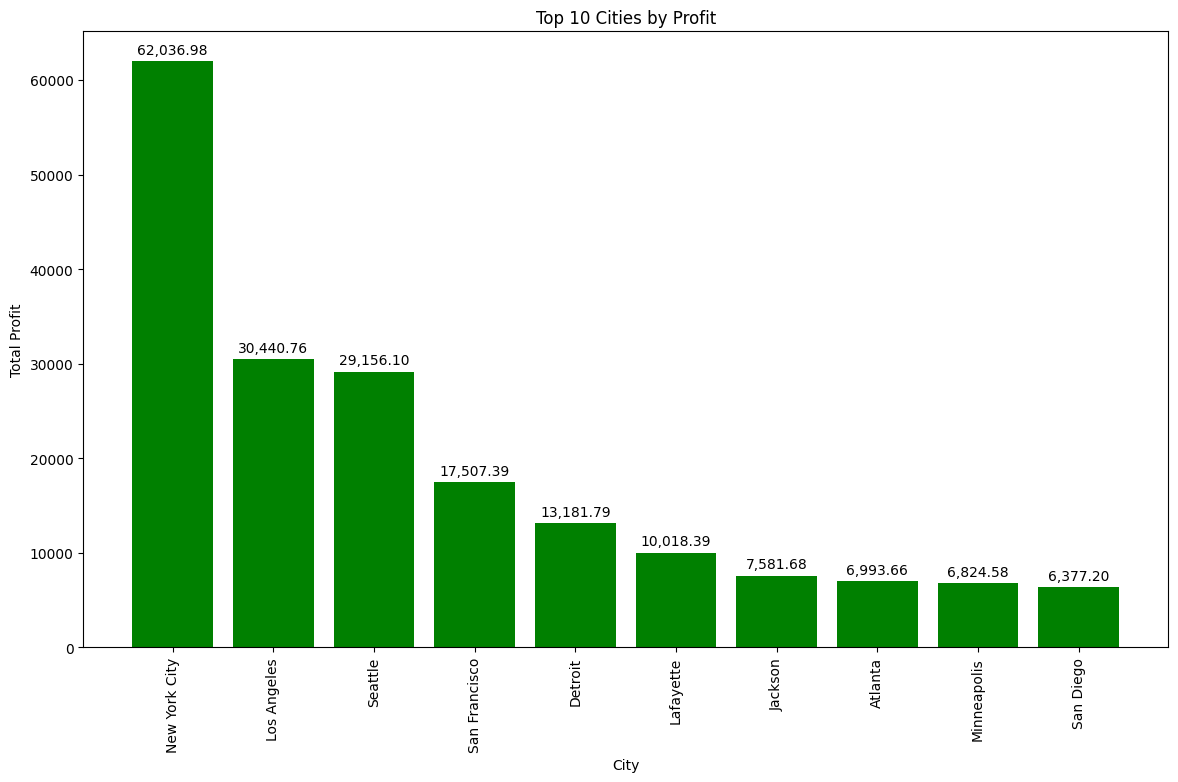

In [ ]:
# TOP 10 CITIES BY PROFIT
# Group by city and sum the profits
profit_by_city = data.groupby('City')['Profit'].sum().reset_index()

# Sort by profit to find the top performers
top_profit_cities = profit_by_city.sort_values(by='Profit', ascending=False).head(10)

# Visualization
plt.figure(figsize=(14, 8))
bars = plt.bar(top_profit_cities['City'], top_profit_cities['Profit'], color='green')
plt.title('Top 10 Cities by Profit')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)

# Annotate bars with profit values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()

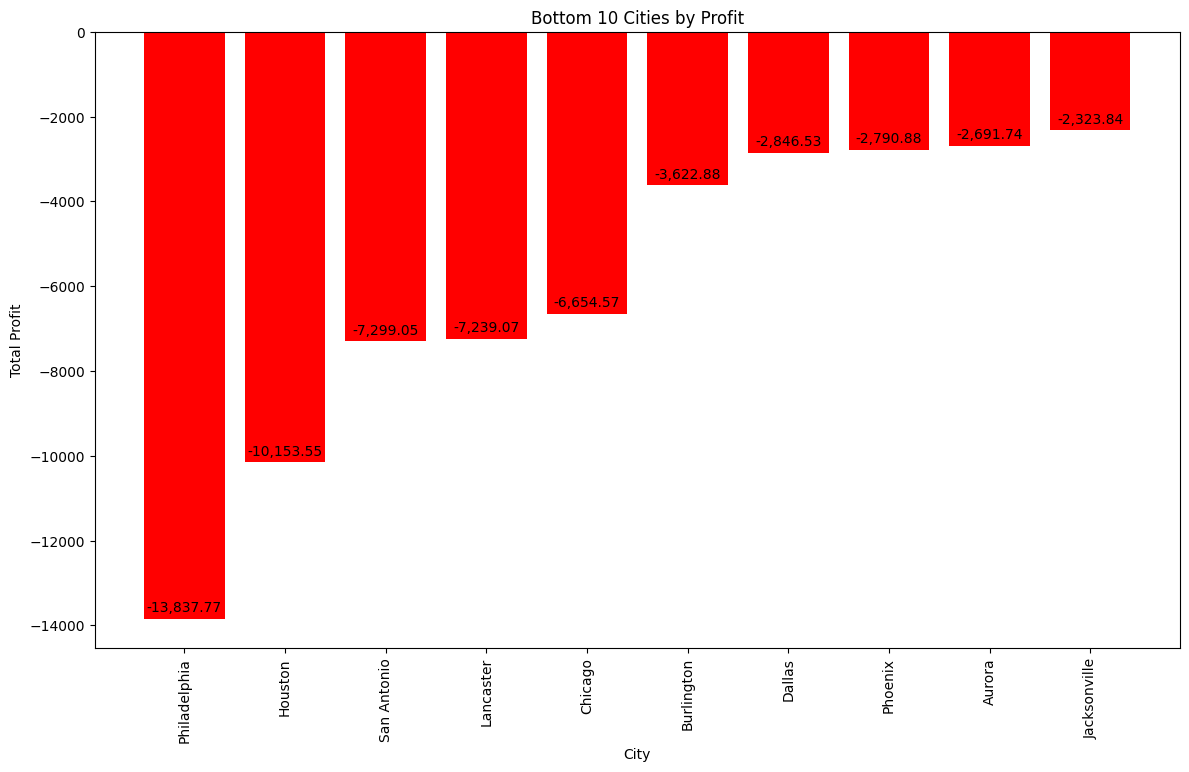

In [ ]:
# Bottom 10 Cities by Profit
# Sort by profit to find the bottom performers
bottom_profit_cities = profit_by_city.sort_values(by='Profit', ascending=True).head(10)

#  Visualization
plt.figure(figsize=(14, 8))
bars = plt.bar(bottom_profit_cities['City'], bottom_profit_cities['Profit'], color='red')
plt.title('Bottom 10 Cities by Profit')
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.xticks(rotation=90)

# Annotate bars with profit values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:,.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()

Correlation between Sales and Profit: 0.48


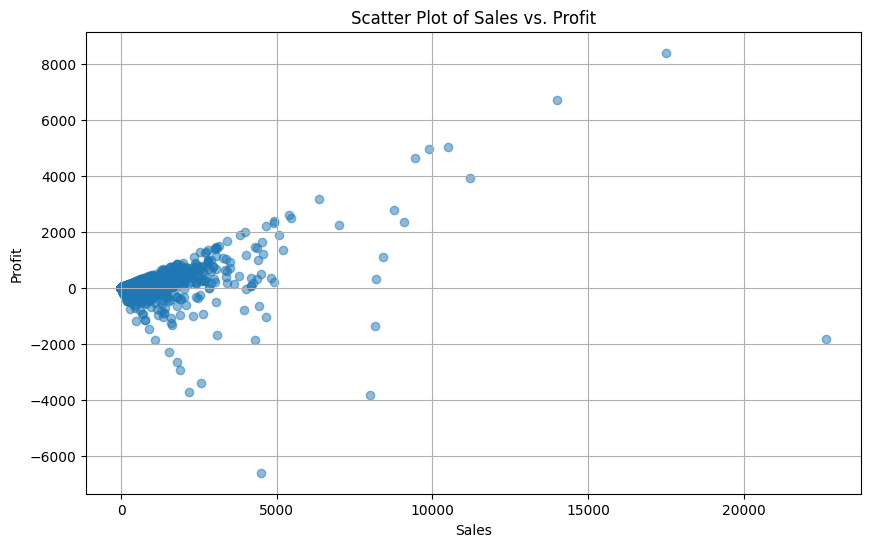

In [ ]:
#CORRELATION BETWEEN SALES AND PROFIT
correlation = data['Sales'].corr(data['Profit'])
print(f"Correlation between Sales and Profit: {correlation:.2f}")

# Plot the relationship between profit and sales
plt.figure(figsize=(10, 6))
plt.scatter(data['Sales'], data['Profit'], alpha=0.5)
plt.title('Scatter Plot of Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

Correlation between total Sales and total Profit per order: 0.49


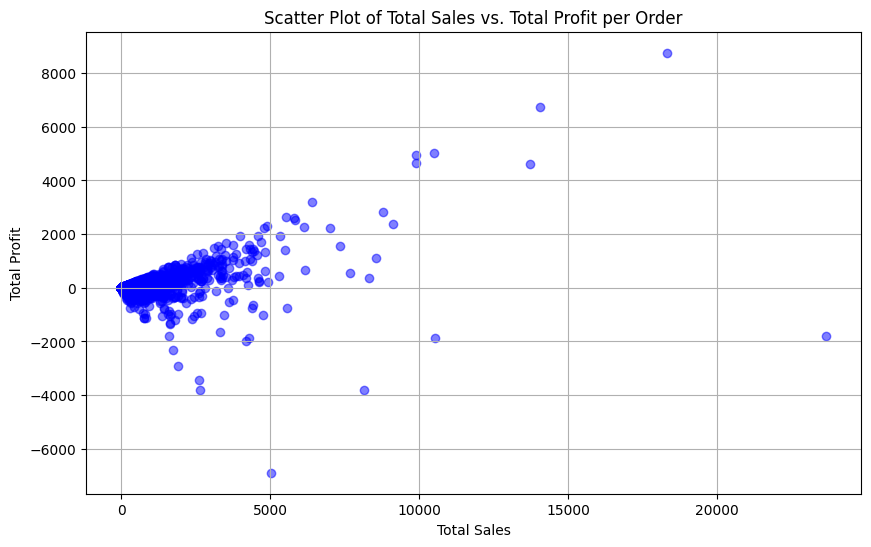

In [ ]:
# Group by 'Order ID' and sum the sales and profit
grouped_data = data.groupby('Order ID').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Calculate the correlation between total sales and total profit per order
correlation = grouped_data['Sales'].corr(grouped_data['Profit'])
print(f"Correlation between total Sales and total Profit per order: {correlation:.2f}")

#  Plot the relationship between total sales and total profit per order
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['Sales'], grouped_data['Profit'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Total Sales vs. Total Profit per Order')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

In [ ]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Order ID  5009 non-null   object 
 1   Sales     5009 non-null   float64
 2   Profit    5009 non-null   float64
dtypes: float64(2), object(1)
memory usage: 117.5+ KB


Correlation between Discount and Sales: -0.03
Correlation between Discount and Profit: -0.22


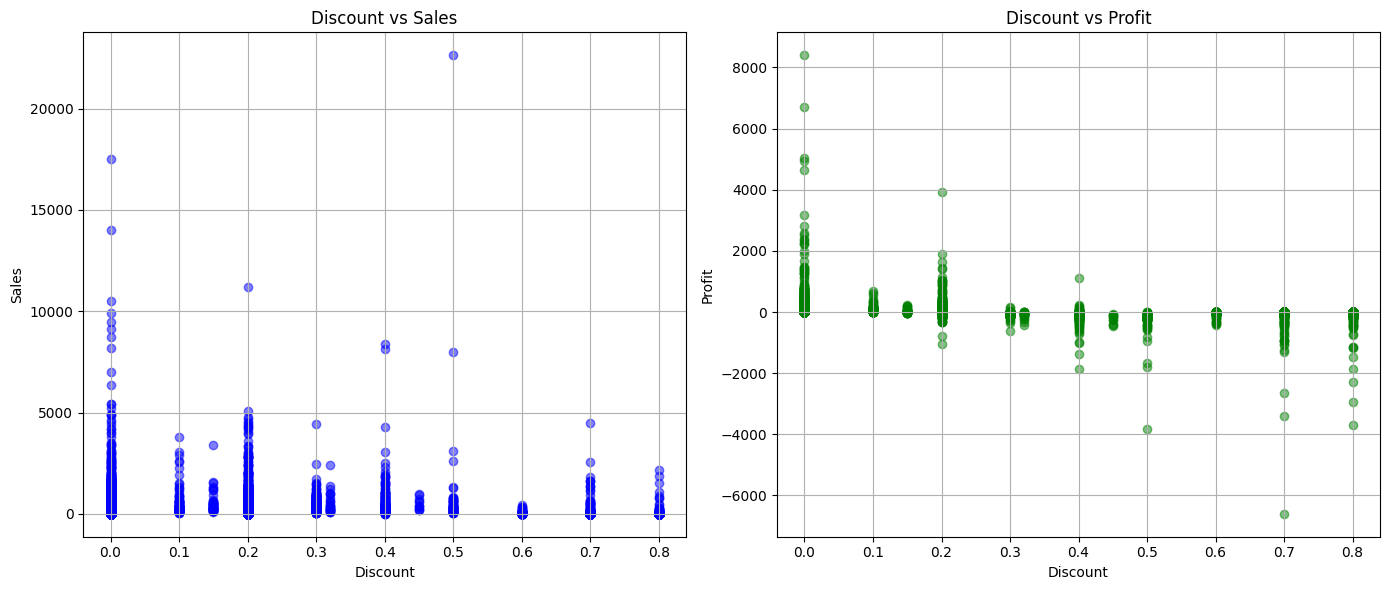


Average Sales and Profit by Discount Level:
    Discount  Sales  Profit
0       0.00 226.74   66.90
1       0.10 578.40   96.06
2       0.15 529.97   27.29
3       0.20 209.08   24.70
4       0.30 454.74  -45.68
5       0.32 536.79  -88.56
6       0.40 565.13 -111.93
7       0.45 498.63 -226.65
8       0.50 892.71 -310.70
9       0.60  48.15  -43.08
10      0.70  97.18  -95.87
11      0.80  56.55 -101.80


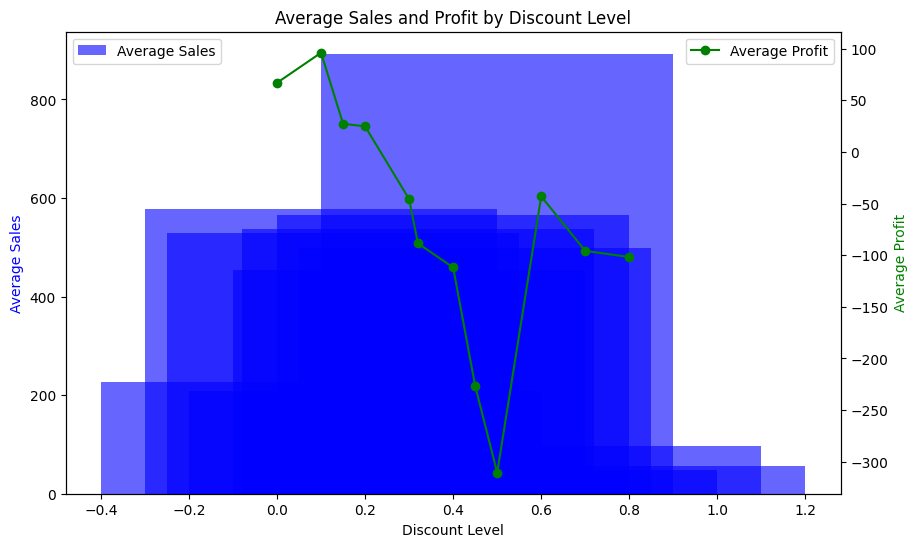

In [ ]:
# Ensure there are no missing values in relevant columns
data = data.dropna(subset=['Sales', 'Profit', 'Discount'])

# Correlation Analysis
corr_discount_sales = data['Discount'].corr(df['Sales'])
corr_discount_profit = data['Discount'].corr(df['Profit'])
print(f"Correlation between Discount and Sales: {corr_discount_sales:.2f}")
print(f"Correlation between Discount and Profit: {corr_discount_profit:.2f}")

#  Visual Analysis
plt.figure(figsize=(14, 6))

# Discount vs Sales
plt.subplot(1, 2, 1)
plt.scatter(data['Discount'], data['Sales'], alpha=0.5, color='blue')
plt.title('Discount vs Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.grid(True)

# Discount vs Profit
plt.subplot(1, 2, 2)
plt.scatter(data['Discount'], data['Profit'], alpha=0.5, color='green')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)

plt.tight_layout()
plt.show()

# Aggregate Analysis
# Group by discount values and calculate average sales and profit
grouped_data = data.groupby('Discount').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()
print("\nAverage Sales and Profit by Discount Level:")
print(grouped_data)

# Plot the aggregate analysis
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
ax1.bar(grouped_data['Discount'], grouped_data['Sales'], color='blue', alpha=0.6, label='Average Sales')
ax2.plot(grouped_data['Discount'], grouped_data['Profit'], color='green', marker='o', label='Average Profit')

ax1.set_xlabel('Discount Level')
ax1.set_ylabel('Average Sales', color='blue')
ax2.set_ylabel('Average Profit', color='green')
ax1.set_title('Average Sales and Profit by Discount Level')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

# Customer Insights

In [ ]:
# Data cleaning: Convert date columns to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Calculate RFM metrics
today = pd.to_datetime('now')
rfm_data = data.groupby('Customer ID').agg({
    'Order Date': lambda x: (today - x.max()).days,  # Recency
    'Order ID': 'nunique',  # Frequency
    'Sales': 'sum'  # Monetary Value
}).reset_index()

# Rename columns
rfm_data.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# RFM scoring
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], q=4, labels=[4, 3, 2, 1])
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'], q=4, labels=[1, 2, 3, 4])
rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'], q=4, labels=[1, 2, 3, 4])

# Calculate RFM segment
rfm_data['RFM_Segment'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

# Calculate RFM score
rfm_data['RFM_Score'] = rfm_data[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# Print RFM segments
print(rfm_data[['Customer ID', 'RFM_Segment', 'RFM_Score']].head(15))

   Customer ID RFM_Segment  RFM_Score
0     AA-10315         114          6
1     AA-10375         441          9
2     AA-10480         112          4
3     AA-10645         324          9
4     AB-10015         111          3
5     AB-10060         334         10
6     AB-10105         344         11
7     AB-10150         311          5
8     AB-10165         431          8
9     AB-10255         241          7
10    AB-10600         312          6
11    AC-10420         111          3
12    AC-10450         434         11
13    AC-10615         413          8
14    AC-10660         111          3


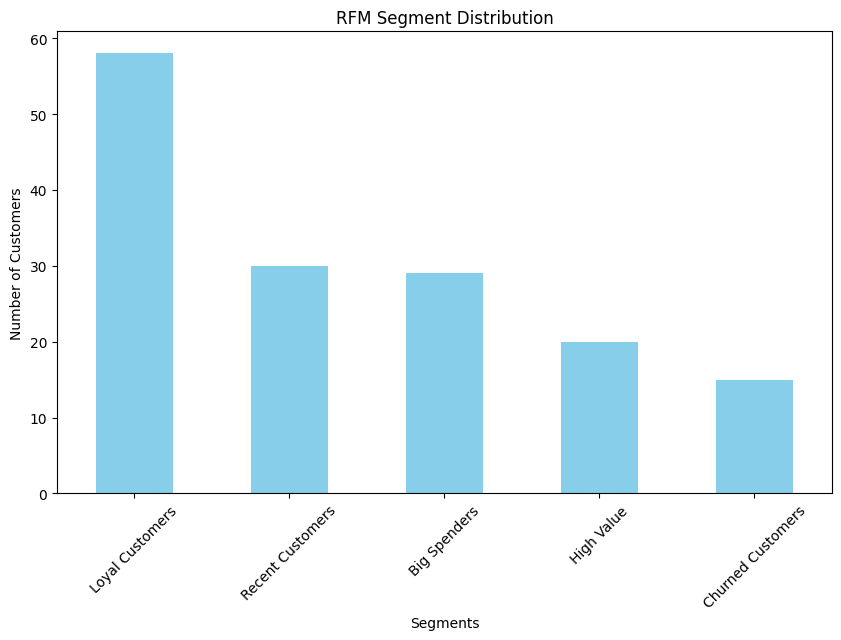

RFM Segment Details:
                   Recency  Frequency  Monetary
Segment                                        
Big Spenders         16.48      22.79  6,164.34
Churned Customers   313.67      22.60  7,484.07
High Value           18.05       5.40    447.70
Loyal Customers     475.41       5.03    498.47
Recent Customers    125.33       5.60    613.40


In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Calculate RFM Metrics
# Calculate Recency, Frequency, and Monetary Value for each customer
current_date = data['Order Date'].max()  # Get the current date for recency calculation
rfm_data = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (current_date - x.max()).days,  # Recency
    'Sales': ['count', 'sum']  # Frequency and Monetary Value
})
rfm_data.columns = ['Recency', 'Frequency', 'Monetary']

# Step 3: RFM Segmentation
# Define quantiles for binning
quantiles = rfm_data.quantile(q=[0.25, 0.5, 0.75])

# Create RFM segments based on quantiles
def rfm_segment(x, metric, quantiles):
    if x <= quantiles[metric][0.25]:
        return 1
    elif x <= quantiles[metric][0.5]:
        return 2
    elif x <= quantiles[metric][0.75]:
        return 3
    else:
        return 4

rfm_data['R'] = rfm_data['Recency'].apply(rfm_segment, args=('Recency', quantiles))
rfm_data['F'] = rfm_data['Frequency'].apply(rfm_segment, args=('Frequency', quantiles))
rfm_data['M'] = rfm_data['Monetary'].apply(rfm_segment, args=('Monetary', quantiles))

# Combine RFM values to create RFM segments
rfm_data['RFM Segment'] = rfm_data['R'].astype(str) + rfm_data['F'].astype(str) + rfm_data['M'].astype(str)

# Assign labels to RFM segments
segment_labels = {
    '111': 'High Value',
    '411': 'Loyal Customers',
    '144': 'Big Spenders',
    '444': 'Low Value',
    '311': 'Frequent Buyers',
    '311': 'Recent Customers',
    '444': 'Churned Customers'
}
rfm_data['Segment'] = rfm_data['RFM Segment'].map(segment_labels)

# Analysis and Visualization
# Analyze segment characteristics
segment_counts = rfm_data['Segment'].value_counts()

# Plot segment distribution
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color='skyblue')
plt.title('RFM Segment Distribution')
plt.xlabel('Segments')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# Display segment details
print("RFM Segment Details:")
print(rfm_data.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}))